## Prophet를 이용한 비트코인 가격 예측
이번 시간에는 지옥으로(?) 가고 있는 비트코인의 가격을 예측해 볼 계획입니다. 저는 예언 능력이 없으니, 그 전처럼 예언자라 이름 붙인 페이스북의 Prophet을 이용해 보겠습니다.
비트코인 데이터를 가져오는 것은 전처럼 야후 파이낸스에서 비트코인 가격 데이터를 제공하기 때문에 여기에서 가져오겠습니다. BTC-USD 가격입니다.

가져오는 명령어는 다음과 같습니다. 
`BTC = web.DataReader('BTC-USD','yahoo',start,end)`

In [4]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from fbprophet import Prophet

start = datetime(2010, 1, 1)
end = datetime(2018, 11, 19)

BTC = web.DataReader('BTC-USD','yahoo',start,end)
BTC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-07-16,0.04951,0.04951,0.04951,0.04951,0,0.04951
2010-07-17,0.08585,0.05941,0.04951,0.08584,5,0.08584
2010-07-18,0.09307,0.07723,0.08584,0.08080,49,0.08080
2010-07-19,0.08181,0.07426,0.08080,0.07474,20,0.07474
2010-07-20,0.07921,0.06634,0.07474,0.07921,42,0.07921


2010년 7월 16일부터 가격이 있네요. 
비트코인 시세 0.05달러. 1 BTC가 55원 정도 했나 봅니다.

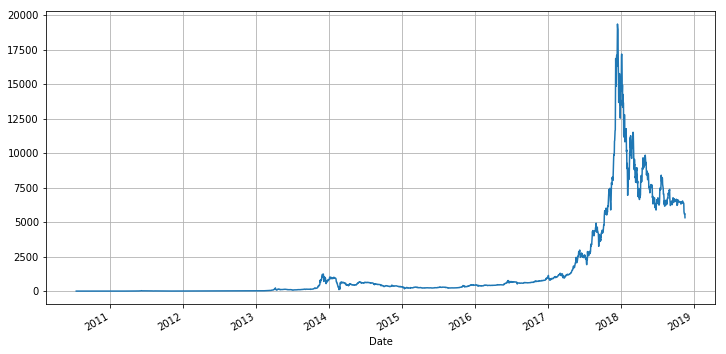

In [5]:
BTC['Close'].plot(figsize=(12,6), grid=True);

그래프를 그려 봅니다. 급등했다가 급격하게 하락하고 있습니다.
시계열 ds와 종가 y만 정리합니다.

In [7]:
df = pd.DataFrame({'ds':BTC.index, 'y':BTC['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2010-07-16,0.04951
1,2010-07-17,0.08584
2,2010-07-18,0.08080
3,2010-07-19,0.07474
4,2010-07-20,0.07921


In [26]:
m = Prophet(daily_seasonality=True)
m.fit(df);
future = m.make_future_dataframe(periods=90)
future.tail()

,ds
3133,2019-02-13
3134,2019-02-14
3135,2019-02-15
3136,2019-02-16
3137,2019-02-17


In [27]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3133,2019-02-13,11374.208527,9594.305057,13033.377117
3134,2019-02-14,11393.397072,9629.324883,13293.473617
3135,2019-02-15,11427.439811,9710.001353,13125.323677
3136,2019-02-16,11459.126817,9737.009162,13172.929826
3137,2019-02-17,11486.428240,9630.700515,13290.778871


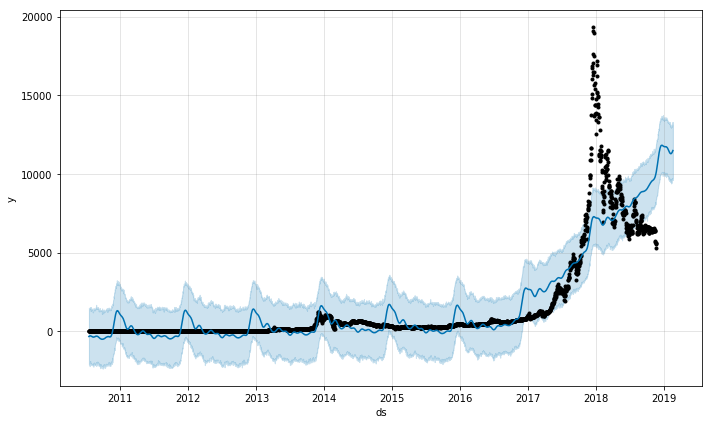

In [29]:
m.plot(forecast);

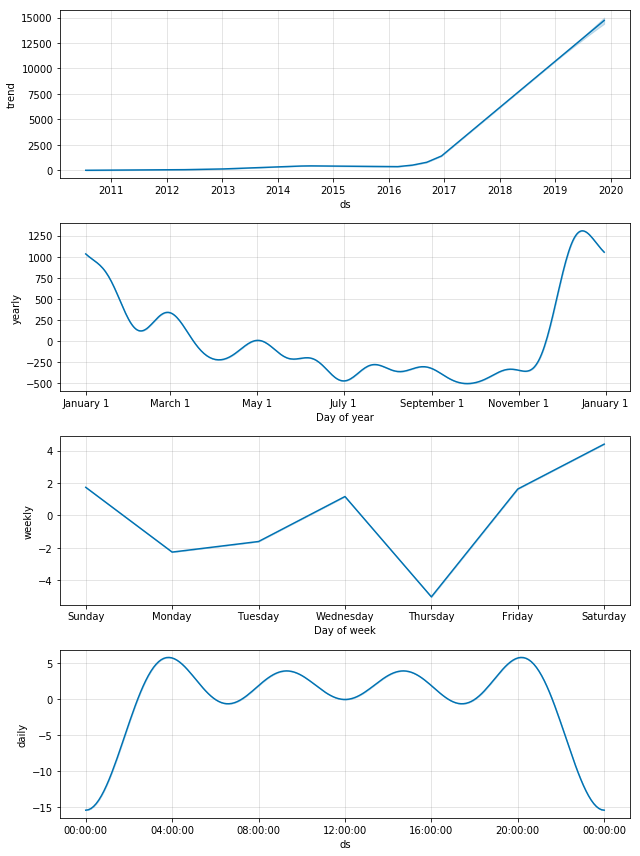

In [25]:
m.plot_components(forecast);

이렇게 떨어지고 있는데, 올라간다고 나오는군요. 그동안 계속 오르는 추세였으니까 그런 것 같습니다. 입력 기간에 따라 앞으로의 예측도 달라지겠죠? 기간을 바꾸어 넣어 보겠습니다.